# Linear Models, Matt Moravec

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model, preprocessing
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
testData = pd.read_csv("TestData.csv", index_col=0)
data = pd.read_csv("TrainData.csv", index_col=0)

X = data.drop(["Happiness Score"], axis=1)
X = X.drop(["Target Class"], axis =1)
y = data[["Happiness Score"]]
# Standardize data
X = (X-X.mean())/X.std()

X_test = testData.drop(["Happiness Score"], axis=1)
X_test = X_test.drop(["Target Class"], axis=1)
y_test = testData[["Happiness Score"]]
# Standardize data
X_test = (X_test-X_test.mean())/X_test.std()

#Whole Data

X_whole = pd.concat([X, X_test])
y_whole = pd.concat([y, y_test])
#test=pd.read_csv("TestData.csv")

In [3]:
X_whole

,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index,Press Freedom Index
Angola,0.811268,-0.698781,0.127181,2.150234,0.449983,-1.460536,1.841213,-1.113601,2.054723,2.376442,-0.982624,-0.643233,-0.820364,-1.284213,-2.433957,0.203097
Argentina,-0.357364,0.031567,1.412480,-0.295362,0.073634,0.633211,-0.308654,0.341673,-0.629413,-0.278733,1.405405,0.720988,1.188372,-0.135582,-1.311504,-0.191336
Armenia,-0.201547,-0.400404,0.171502,-0.748250,0.449983,0.386888,-0.666965,0.341673,-0.760804,-0.767844,0.417472,0.805321,-0.249225,0.272609,1.020585,-0.205149
Australia,-0.980635,1.286983,1.146556,-0.657672,-0.679066,1.495343,-0.756543,0.923782,-0.896888,-0.697971,1.629263,0.775556,2.172729,1.411747,1.358411,-0.848982
Austria,-1.214361,1.625857,-0.050102,-0.929405,0.449983,1.125858,-1.204431,1.360364,-0.915658,-0.837717,1.419041,0.725948,0.838957,1.269355,0.889814,-1.188932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hungary,-1.072896,0.457164,0.402343,-0.824436,1.335493,0.137969,-0.860088,1.162690,-0.695315,-0.683071,0.514140,0.646760,0.439672,0.894203,0.445949,0.062125
Turkey,0.072578,0.305413,0.642874,0.179078,-1.112911,0.463183,-0.049148,-0.454385,-0.350172,0.047013,0.899568,0.305661,0.671544,-0.283585,-0.640223,1.751185
Liberia,1.946991,-1.234280,-0.511675,1.851602,-0.500810,-1.813313,1.775467,-1.336426,3.234008,1.780962,-1.120935,-2.012424,-1.612387,-1.090113,-1.090587,0.186295
Togo,1.113918,-1.218522,-0.992737,2.074605,-0.194759,-2.301133,1.775467,-1.336426,1.840161,2.146003,-1.428826,-2.040269,-1.052337,-1.346154,-1.130325,-0.070851


In [4]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Train Lasso
lasso = linear_model.Lasso(alpha=.001)
lasso.fit(X, y)

# Train Ridge
ridge = linear_model.Ridge(alpha=50)
ridge.fit(X, y);

In [5]:
print(regr.score(X, y))
print(regr.score(X_test, y_test))

0.7772316640497734
0.46172435615139695


In [6]:
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))

0.7768416133334614
0.47275620242147404


In [7]:
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7356615242187541
0.47807747174588416


In [8]:
from regressors import stats
print(stats.coef_pval(regr, X_test, y_test))
print(stats.coef_pval(lasso, X_test, y_test))
print(stats.coef_pval(ridge, X_test, y_test))
print(stats.coef_pval(regr, X, y))
print(stats.coef_pval(lasso, X, y))
print(stats.coef_pval(ridge, X, y))

[0.         0.87962597 0.3374868  0.79242284 0.69196523 0.49456286
 0.87435324 0.88935835 0.93289926 0.48955337 0.87285119 0.47545152
 0.70833634 0.8608306  0.85972171 0.95905903 0.31505917]
[0.         0.89765699 0.32671667 0.77858294 0.78247598 0.50135177
 0.87699545 0.9329229  0.93607229 0.50942086 0.94997193 0.46496498
 0.69342799 0.87734787 0.88545078 1.         0.31240944]
[0.         0.93579211 0.57748553 0.63789758 0.97378297 0.81631807
 0.89364441 0.97095158 0.97312445 0.99547042 0.97614336 0.8109838
 0.87376977 0.85001296 0.96099447 0.94222929 0.58657643]
[0.         0.50765226 0.00228105 0.38091006 0.18875418 0.01756376
 0.72939684 0.57174627 0.69937773 0.0185755  0.52667399 0.04589797
 0.23190403 0.60506356 0.50585108 0.87832343 0.00990719]
[0.         0.57783436 0.0020415  0.35468222 0.36422549 0.02072425
 0.73776235 0.73501209 0.7160317  0.02606765 0.80597836 0.04327319
 0.21297802 0.65256157 0.59163479 1.         0.01031752]
[0.         0.74986213 0.10437613 0.15753698 0

In [9]:
print('linear model coeff (w): {}'
     .format(regr.coef_))

linear model coeff (w): [[-0.08880418  0.34734184  0.08295628 -0.734828   -0.32686508  0.1108937
   0.19571307  0.09809002  0.49289343  0.22335821  0.3060522   0.15830726
   0.09244124 -0.12446761  0.01848924 -0.25295378]]


In [10]:
print('lasso model coeff (w): {}'
     .format(lasso.coef_))

lasso model coeff (w): [-0.07464123  0.35162497  0.08772434 -0.50648333 -0.31839162  0.10742388
  0.1171791   0.09247841  0.46557886  0.08664957  0.31020079  0.16512177
  0.08053372 -0.10040828  0.         -0.25174508]


In [11]:
print('ridge model coeff (w): {}'
     .format(ridge.coef_))

ridge model coeff (w): [[-0.04650987  0.19768572  0.14626266 -0.05994719 -0.10909423  0.09231607
  -0.05043817  0.03864598  0.00397229 -0.04108928  0.10063421  0.06614188
   0.09818738  0.03390867  0.02570203 -0.13406101]]


In [12]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X_whole, y_whole)

# Train Lasso
lasso = linear_model.Lasso(alpha=.01)
lasso.fit(X_whole, y_whole)

# Train Ridge
ridge = linear_model.Ridge(alpha=50)
ridge.fit(X_whole, y_whole);

In [13]:
print('linear model coeff (w): {}'
     .format(regr.coef_))
print('lasso model coeff (w): {}'
     .format(lasso.coef_))
print('ridge model coeff (w): {}'
     .format(ridge.coef_))

linear model coeff (w): [[-0.16166444  0.42961462  0.15440866 -0.11073489  0.00605987  0.69293535
   0.51066713 -0.33517462  0.37646341 -0.39377109  0.22453064  0.2014006
  -0.09975117 -0.11581254  0.01292722 -0.23677205]]
lasso model coeff (w): [-0.04471551  0.34623504  0.17078526 -0.         -0.1721679   0.28396617
  0.00950447 -0.09224676  0.16452251 -0.14214683  0.11964185  0.15864993
  0.         -0.03509845 -0.         -0.22036522]
ridge model coeff (w): [[-0.04490842  0.21761631  0.16822211 -0.04746672 -0.15726955  0.13595276
  -0.01812427 -0.0154016  -0.00149594 -0.0647064   0.0776718   0.07941762
   0.06901825  0.02339162  0.02428345 -0.14442434]]


In [14]:
print(stats.coef_pval(regr, X_whole, y_whole))
print(stats.coef_pval(lasso, X_whole, y_whole))
print(stats.coef_pval(ridge, X_whole, y_whole))

[0.00000000e+00 1.88717061e-01 4.81166282e-05 7.71121680e-02
 8.28486541e-01 9.56873815e-01 4.49710490e-03 1.20921629e-01
 1.28444793e-01 3.87713930e-02 1.99235633e-01 9.45892208e-02
 7.76942383e-02 5.34875622e-01 4.74609922e-01 9.03937987e-01
 5.33175452e-03]
[0.         0.72209852 0.00121927 0.05683572 1.         0.13584926
 0.24974196 0.97743518 0.6819746  0.37511939 0.65040309 0.38311177
 0.1742604  1.         0.83250001 1.         0.01122649]
[0.         0.73275074 0.04888009 0.0726755  0.93101092 0.19231327
 0.59756939 0.95887826 0.94783585 0.99383908 0.84360544 0.58795656
 0.51437484 0.68883068 0.89280638 0.83263703 0.10934354]


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
model= LinearRegression()
result1 = cross_val_score(model , X_whole, y_whole, cv = kf)
print(result1) 
print("Avg accuracy: {}".format(result1.mean()))

[0.79406825 0.66155576 0.47730211 0.60406143 0.53248253 0.68389609
 0.7976984  0.38014673 0.50509374 0.50378332]
Avg accuracy: 0.5940088363161766


In [16]:
kf = KFold(n_splits=10)
model= linear_model.Lasso(alpha=.1)
result2 = cross_val_score(model , X_whole, y_whole, cv = kf)
print(result2) 
print("Avg accuracy: {}".format(result2.mean()))

[0.68808142 0.61055246 0.47401458 0.58264943 0.66367326 0.732084
 0.77497926 0.64628661 0.48550835 0.29669536]
Avg accuracy: 0.5954524717162026


In [17]:
kf = KFold(n_splits=10)
model= linear_model.Ridge(alpha=1)
result3 = cross_val_score(model , X_whole, y_whole, cv = kf)
print(result3) 
print("Avg accuracy: {}".format(result3.mean()))

[0.7949398  0.69724784 0.48026278 0.60983354 0.5518021  0.7111504
 0.81357098 0.40119606 0.50823736 0.46398868]
Avg accuracy: 0.6032229529306531


In [18]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Train Lasso
lasso = linear_model.Lasso(alpha=.1)
lasso.fit(X, y)
# Train Ridge
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X, y);
print(regr.score(X, y))
print(regr.score(X_test, y_test))
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7772316640497734
0.46172435615139695
0.7289748683481778
0.4835781751125931
0.7757523762055256
0.4864092406954401


In [19]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Train Lasso
lasso = linear_model.Lasso(alpha=.01)
lasso.fit(X, y)
# Train Ridge
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X, y);
print(regr.score(X, y))
print(regr.score(X_test, y_test))
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7772316640497734
0.46172435615139695
0.7700179643338025
0.49551811007204005
0.7637686942279751
0.5027675385577952


In [20]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Train Lasso
lasso = linear_model.Lasso(alpha=.001)
lasso.fit(X, y)
# Train Ridge
ridge = linear_model.Ridge(alpha=100)
ridge.fit(X, y);
print(regr.score(X, y))
print(regr.score(X_test, y_test))
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7772316640497734
0.46172435615139695
0.7768416133334614
0.47275620242147404
0.7142224696115257
0.4561657893385737


In [21]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Train Lasso
lasso = linear_model.Lasso(alpha=.05)
lasso.fit(X, y)
# Train Ridge
ridge = linear_model.Ridge(alpha=50)
ridge.fit(X, y);
print(regr.score(X, y))
print(regr.score(X_test, y_test))
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7772316640497734
0.46172435615139695
0.7492098099000296
0.49193732279898883
0.7356615242187541
0.47807747174588416


In [22]:
# Train MLR
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Train Lasso
lasso = linear_model.Lasso(alpha=.1)
lasso.fit(X, y)
# Train Ridge
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X, y);
print(regr.score(X, y))
print(regr.score(X_test, y_test))
print(lasso.score(X, y))
print(lasso.score(X_test, y_test))
print(ridge.score(X, y))
print(ridge.score(X_test, y_test))

0.7772316640497734
0.46172435615139695
0.7289748683481778
0.4835781751125931
0.7637686942279751
0.5027675385577952


# KNN Classification, Rajib Alam

## Import Statements

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Training data

### Read data

In [24]:
#train data is loaded and index is set to country names
df_train = pd.read_csv("TrainDataClassification.csv")
df_train = df_train.set_index('Countries')
df_train

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index,Press Freedom Index
Countries,,,,,,,,,,,,,,,,,,
Benin,3.340,5.2,3200,0.45,42,9,61,0.46,0.02,55.0,5.7,2,15.362780,42.4,12.135880,6.94,6.20,35.11
Rwanda,3.465,4.0,2070,0.18,32,5,69,0.40,0.03,28.0,4.0,2,7.529250,71.1,11.285540,7.31,7.39,50.34
Burkina Faso,3.587,5.7,1890,0.30,38,8,61,0.45,0.02,52.0,5.2,2,4.775910,28.7,7.692810,6.84,5.85,23.47
Guinea,3.656,6.2,2510,0.36,38,10,60,0.45,0.04,65.0,4.7,2,10.849330,41.0,8.815270,5.68,5.57,34.34
Chad,3.667,5.8,1590,0.23,43,11,58,0.48,0.02,72.0,5.9,2,3.445390,35.4,7.300260,5.55,5.71,39.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Finland,7.406,2.1,49720,0.70,8,10,82,0.16,0.22,2.1,1.4,0,95.601837,100.0,19.269850,8.73,7.76,7.93
Canada,7.427,2.5,49430,0.81,10,8,82,0.16,0.18,4.7,1.5,0,97.092781,99.0,17.158970,8.74,8.17,15.29
Norway,7.522,2.2,70530,0.82,10,8,83,0.17,0.18,2.1,1.5,0,79.263802,100.0,17.672100,8.61,7.60,7.84


### Standardize data 

In [25]:
#Standar scaler is created and fit onto the training data except the Tarhet class
scaler_train = StandardScaler()
scaler_train.fit(df_train.drop('Target Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_train_features = scaler_train.transform(df_train.drop('Target Class',axis=1))
scaled_train_features

array([[-1.76348147,  1.12905582, -0.87016673, ..., -0.28904245,
        -0.85848242,  0.29602899],
       [-1.65718138,  0.18902745, -0.92305488, ...,  0.06411638,
         0.44543899,  1.47115429],
       [-1.5534325 ,  1.52073432, -0.93147954, ..., -0.38449079,
        -1.24198872, -0.60209698],
       ...,
       [ 1.79289424, -1.22101512,  2.28112444, ...,  1.30494471,
         0.67554277, -1.80808571],
       [ 1.79714625, -1.29935082,  1.69373837, ...,  1.41948271,
         1.22340891, -1.78570972],
       [ 1.84817029, -1.14267942,  2.26287101, ...,  1.54356555,
         1.58500056, -1.59358484]])

In [27]:
#dataframe is created using the features 
df_train_features = pd.DataFrame(scaled_train_features, columns = df_train.columns[:-1])
df_train_features.head()

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index
0,-1.763481,1.129056,-0.870167,-0.674265,1.979868,0.452449,-1.468539,1.671164,-1.119703,1.546973,2.108440,-0.801602,-2.043392,-0.305191,-0.289042,-0.858482,0.296029
1,-1.657181,0.189027,-0.923055,-1.877480,1.069129,-1.061198,-0.477847,1.130753,-0.973378,0.273044,0.914090,-1.070063,-0.611841,-0.552680,0.064116,0.445439,1.471154
2,-1.553432,1.520734,-0.931480,-1.342718,1.615572,0.074037,-1.468539,1.581096,-1.119703,1.405425,1.757161,-1.164422,-2.726746,-1.598336,-0.384491,-1.241989,-0.602097
3,-1.494755,1.912413,-0.902461,-1.075337,1.615572,0.830861,-1.592376,1.581096,-0.827053,2.018799,1.405881,-0.956281,-2.113224,-1.271646,-1.491691,-1.548794,0.236617
4,-1.485400,1.599070,-0.945521,-1.654663,2.070942,1.209273,-1.840048,1.851301,-1.119703,2.349077,2.248952,-1.210020,-2.392551,-1.712586,-1.615774,-1.395391,0.650187


In [28]:
X_train = df_train_features
y_train = df_train['Target Class']

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3)

## Training the classifier

In [30]:
#classifier is created and trained
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Test data

### Read data

In [31]:
#test data is loaded and index is set to country names
df_test = pd.read_csv("TestDataClassification.csv")
df_test = df_test.set_index('Countries')
df_test

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index,Press Freedom Index
Countries,,,,,,,,,,,,,,,,,,
Togo,2.839,4.4,1600,0.42,35,8,61,0.41,0.03,42.0,4.6,2,10.321460,60.4,11.965780,6.40,6.25,29.33
Burundi,2.905,4.8,780,0.13,37,6,62,0.44,0.03,41.0,5.3,2,4.408170,67.2,10.647430,6.14,5.94,55.33
Bulgaria,4.218,2.3,22650,0.74,9,16,75,0.14,0.22,5.6,1.6,2,70.785629,98.4,15.040370,7.88,7.74,35.06
Malawi,4.292,4.5,1070,0.17,34,7,64,0.44,0.03,40.0,4.2,2,0.797730,74.8,10.722570,6.98,5.79,29.32
Georgia,4.297,3.4,13980,0.59,13,13,74,0.20,0.15,8.0,2.0,2,46.528179,99.7,14.913870,7.91,8.18,28.59
Botswana,4.332,3.5,17460,0.70,21,9,64,0.31,0.05,28.0,2.5,2,27.513220,85.1,13.072200,7.17,7.60,23.56
Ethiopia,4.512,4.6,2140,0.21,33,6,67,0.40,0.03,39.0,4.3,2,8.144730,39.0,8.353280,5.48,5.61,32.82
Liberia,4.571,5.2,1330,0.52,33,7,64,0.41,0.03,63.0,4.2,2,19.400650,60.8,10.529670,6.60,6.28,32.25
Tunisia,4.739,3.9,10630,0.69,17,6,76,0.25,0.08,14.0,2.1,2,35.176998,79.1,14.685580,6.43,6.07,29.45


### Standardize data

In [32]:
#the test data is standadized like the training data
scaler_test = StandardScaler()
scaler_test.fit(df_test.drop('Target Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_test_features = scaler_test.transform(df_test.drop('Target Class',axis=1))
scaled_test_features

array([[-2.28333704,  1.13118949, -1.23741459, -1.00812914,  2.10677112,
        -0.19777905, -2.33681173,  1.80299557, -1.35714655,  1.86869184,
         2.17927667, -1.45097941, -2.0719027 , -1.06865317, -1.36702581,
        -1.14785092, -0.07194971],
       [-2.22528339,  1.55418386, -1.28601673, -2.42483925,  2.33323186,
        -0.81937034, -2.17168371,  2.11181315, -1.35714655,  1.80128903,
         2.82800465, -1.65461828, -1.59120071, -1.5907507 , -1.70503968,
        -1.56484364,  2.25320482],
       [-1.07036755, -1.08953095,  0.0102377 ,  0.55513719, -0.83721849,
         2.28858611, -0.0250194 , -0.97636265,  1.47928974, -0.58477044,
        -0.60098609,  0.63125495,  0.61437313,  0.14895666,  0.55705317,
         0.8564044 ,  0.44047858],
       [-1.00527709,  1.23693808, -1.26882817, -2.22943096,  1.99354075,
        -0.50857469, -1.84142766,  2.11181315, -1.35714655,  1.73388622,
         1.80857497, -1.77895278, -1.05394554, -1.5609935 , -0.61299486,
        -1.76661431

In [34]:
df_test_features = pd.DataFrame(scaled_test_features, columns = df_test.columns[:-1])
df_test_features.head()

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index
0,-2.283337,1.131189,-1.237415,-1.008129,2.106771,-0.197779,-2.336812,1.802996,-1.357147,1.868692,2.179277,-1.450979,-2.071903,-1.068653,-1.367026,-1.147851,-0.071950
1,-2.225283,1.554184,-1.286017,-2.424839,2.333232,-0.819370,-2.171684,2.111813,-1.357147,1.801289,2.828005,-1.654618,-1.591201,-1.590751,-1.705040,-1.564844,2.253205
2,-1.070368,-1.089531,0.010238,0.555137,-0.837218,2.288586,-0.025019,-0.976363,1.479290,-0.584770,-0.600986,0.631255,0.614373,0.148957,0.557053,0.856404,0.440479
3,-1.005277,1.236938,-1.268828,-2.229431,1.993541,-0.508575,-1.841428,2.111813,-1.357147,1.733886,1.808575,-1.778953,-1.053946,-1.560993,-0.612995,-1.766614,-0.072844
4,-1.000879,0.073704,-0.503641,-0.177644,-0.384297,1.356199,-0.190147,-0.358727,0.434287,-0.423004,-0.230284,-0.204111,0.706272,0.098860,0.596055,1.448265,-0.138127


In [35]:
X_test = df_test_features
y_test = df_test['Target Class']

## Predict data

In [36]:
#class lables are predcited using the previously trained classifier
pred = knn.predict(X_test)
pred

array([2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

## Metrics

In [37]:
#classification report is printed out (test data)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.68      0.88      0.77        17
           2       1.00      0.54      0.70        13

    accuracy                           0.73        33
   macro avg       0.73      0.70      0.68        33
weighted avg       0.79      0.73      0.72        33



[[ 2  1  0]
 [ 2 15  0]
 [ 0  6  7]]


Text(0.5, 1, 'Confusion Matrix')

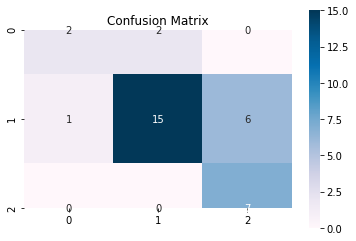

In [38]:
# Print the confusion matrix (test data)
print(metrics.confusion_matrix(y_test, pred))

#confusion matrix using heatmap
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion.T, square = True, annot = True, cmap = 'PuBu')

plt.title('Confusion Matrix')

In [39]:
#print the metrics separately

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,  pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,  pred, average = 'weighted' )))
print('Recall: {:.2f}'.format(recall_score(y_test,  pred, average = 'weighted')))
print('F1: {:.2f}'.format(f1_score(y_test,  pred, average = 'weighted')))


Accuracy: 0.73
Precision: 0.79
Recall: 0.73
F1: 0.72


## Error rate

In [40]:
#error rate is printed out for number of neighbors ranging from 1 to 40
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

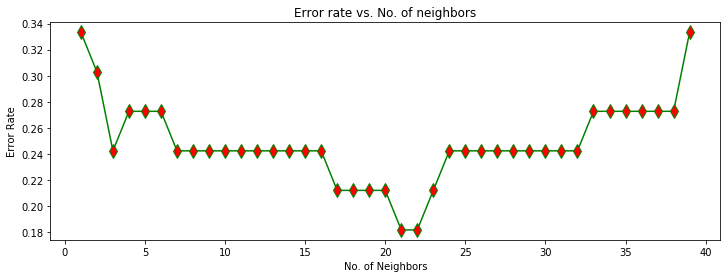

In [41]:
#the error rate is printed out
plt.figure(figsize=(12,4))
plt.plot(range(1,40), error_rate, color='green', marker='d', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. No. of neighbors')
plt.xlabel('No. of Neighbors')
plt.ylabel('Error Rate')



## Modifying the classifier

In [42]:
#the classifer is modified based on the error rate

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

#class lables are predicted again
pred= knn.predict(X_test)

## Final Metrics

In [43]:
#fina classification report is printed out (test dataset)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.74      1.00      0.85        17
           2       1.00      0.62      0.76        13

    accuracy                           0.82        33
   macro avg       0.91      0.76      0.80        33
weighted avg       0.87      0.82      0.81        33



[[ 2  1  0]
 [ 0 17  0]
 [ 0  5  8]]


Text(0.5, 1, 'Confusion Matrix')

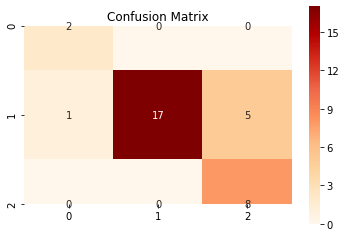

In [44]:
# Print the confusion matrix (test data)
print(metrics.confusion_matrix(y_test, pred))

#final confusion matrix using heatmap
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion.T, square = True, annot = True, cmap ='OrRd')

plt.title('Confusion Matrix')


In [45]:
#final metrics test dataset

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,  pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,  pred, average = 'weighted' )))
print('Recall: {:.2f}'.format(recall_score(y_test,  pred, average = 'weighted')))
print('F1: {:.2f}'.format(f1_score(y_test,  pred, average = 'weighted')))



Accuracy: 0.82
Precision: 0.87
Recall: 0.82
F1: 0.81


In [46]:
#final metrics training dataset

pred_train = knn.predict(X_train)

print('Accuracy: {:.2f}'.format(accuracy_score(y_train,  pred_train)))
print('Precision: {:.2f}'.format(precision_score(y_train,  pred_train, average = 'weighted' )))
print('Recall: {:.2f}'.format(recall_score(y_train,  pred_train, average = 'weighted')))
print('F1: {:.2f}'.format(f1_score(y_train,  pred_train, average = 'weighted')))

Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1: 0.73


## Data Exploration

In [47]:
#To explore and visualise the data teo dataframes are formed using the train and test sets respectively

Target_train = df_train['Target Class'].to_list()
df = pd.DataFrame(scaled_train_features, columns = df_train.columns[:-1])
df['Target Class'] = Target_train
df

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index
0,-1.763481,1.129056,-0.870167,-0.674265,1.979868,0.452449,-1.468539,1.671164,-1.119703,1.546973,2.108440,2,-2.043392,-0.305191,-0.289042,-0.858482,0.296029
1,-1.657181,0.189027,-0.923055,-1.877480,1.069129,-1.061198,-0.477847,1.130753,-0.973378,0.273044,0.914090,2,-0.611841,-0.552680,0.064116,0.445439,1.471154
2,-1.553432,1.520734,-0.931480,-1.342718,1.615572,0.074037,-1.468539,1.581096,-1.119703,1.405425,1.757161,2,-2.726746,-1.598336,-0.384491,-1.241989,-0.602097
3,-1.494755,1.912413,-0.902461,-1.075337,1.615572,0.830861,-1.592376,1.581096,-0.827053,2.018799,1.405881,2,-2.113224,-1.271646,-1.491691,-1.548794,0.236617
4,-1.485400,1.599070,-0.945521,-1.654663,2.070942,1.209273,-1.840048,1.851301,-1.119703,2.349077,2.248952,2,-2.392551,-1.712586,-1.615774,-1.395391,0.650187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.694248,-1.299351,1.307140,0.439823,-1.116646,0.830861,1.132027,-1.030894,1.806793,-0.948985,-0.912563,0,0.829686,1.771134,1.419483,0.850860,-1.801141
88,1.712106,-0.986008,1.293567,0.930021,-0.934498,0.074037,1.132027,-1.030894,1.221494,-0.826311,-0.842307,0,0.779806,1.156768,1.429028,1.300110,-1.233254
89,1.792894,-1.221015,2.281124,0.974585,-0.934498,0.074037,1.255863,-0.940825,1.221494,-0.948985,-0.842307,0,0.829686,1.306113,1.304945,0.675543,-1.808086
90,1.797146,-1.299351,1.693738,1.241966,-0.843424,0.452449,1.008190,-1.030894,1.514143,-0.901803,-0.701795,0,0.779806,1.747545,1.419483,1.223409,-1.785710


In [48]:
Target_test = df_test['Target Class'].to_list()
df2 = pd.DataFrame(scaled_test_features, columns = df_train.columns[:-1])
df2['Target Class'] = Target_test
df2

,Happiness Score,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,Target Class,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index
0,-2.283337,1.131189,-1.237415,-1.008129,2.106771,-0.197779,-2.336812,1.802996,-1.357147,1.868692,2.179277,2,-2.071903,-1.068653,-1.367026,-1.147851,-0.071950
1,-2.225283,1.554184,-1.286017,-2.424839,2.333232,-0.819370,-2.171684,2.111813,-1.357147,1.801289,2.828005,2,-1.591201,-1.590751,-1.705040,-1.564844,2.253205
2,-1.070368,-1.089531,0.010238,0.555137,-0.837218,2.288586,-0.025019,-0.976363,1.479290,-0.584770,-0.600986,2,0.614373,0.148957,0.557053,0.856404,0.440479
3,-1.005277,1.236938,-1.268828,-2.229431,1.993541,-0.508575,-1.841428,2.111813,-1.357147,1.733886,1.808575,2,-1.053946,-1.560993,-0.612995,-1.766614,-0.072844
4,-1.000879,0.073704,-0.503641,-0.177644,-0.384297,1.356199,-0.190147,-0.358727,0.434287,-0.423004,-0.230284,2,0.706272,0.098860,0.596055,1.448265,-0.138127
5,-0.970093,0.179452,-0.297378,0.359729,0.521546,0.113017,-1.841428,0.773604,-1.058574,0.925053,0.233093,2,-0.325823,-0.630485,-0.365985,0.668085,-0.587955
6,-0.811765,1.342687,-1.205408,-2.034023,1.880310,-0.819370,-1.346044,1.700056,-1.357147,1.666483,1.901250,2,-3.584700,-2.499288,-2.563075,-2.008739,0.240158
7,-0.759868,1.977178,-1.253418,-0.519608,1.880310,-0.508575,-1.841428,1.802996,-1.357147,3.284151,1.808575,2,-2.043626,-1.637387,-1.107015,-1.107497,0.189183
8,-0.612096,0.602447,-0.702198,0.310877,0.068624,-0.819370,0.140109,0.155968,-0.610716,-0.018587,-0.137609,2,-0.749972,0.008452,-1.328024,-1.389976,-0.061218
9,-0.570754,2.823167,-1.101684,-1.789762,0.974467,-1.440962,-0.025019,1.082421,-1.357147,0.857650,1.159847,2,0.706272,-1.066768,-1.029012,-1.416878,2.254099


### Andrews curves plot

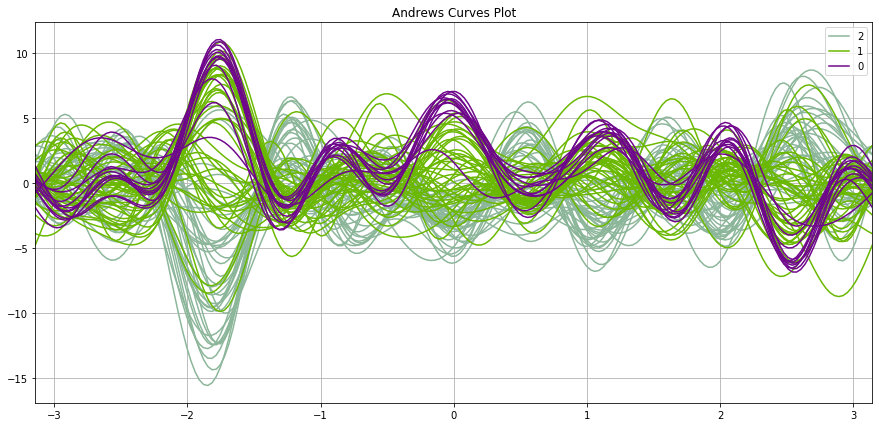

In [49]:
#Andrews curves are plotted using training dataset

plt.figure(figsize=(15,7))
andrews_curves(df, "Target Class")
plt.title('Andrews Curves Plot')
plt.show()

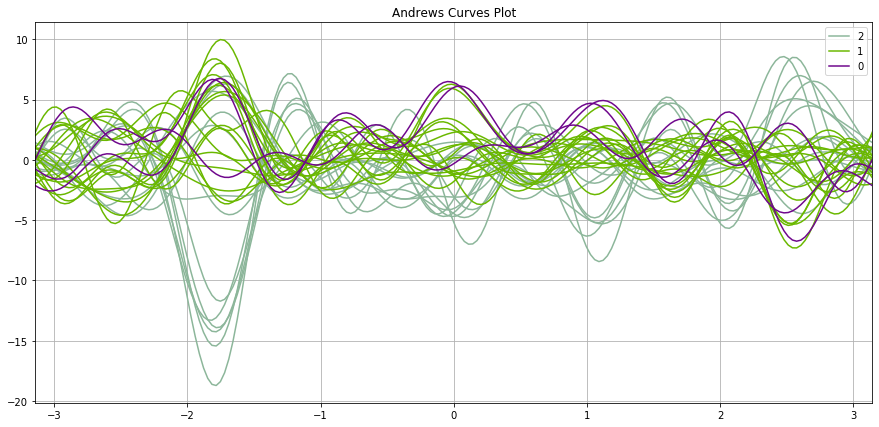

In [50]:
#Andrews curves are plotted using test dataset

plt.figure(figsize=(15,7))
andrews_curves(df2, "Target Class")
plt.title('Andrews Curves Plot')
plt.show()

### Parallel coordinates plot

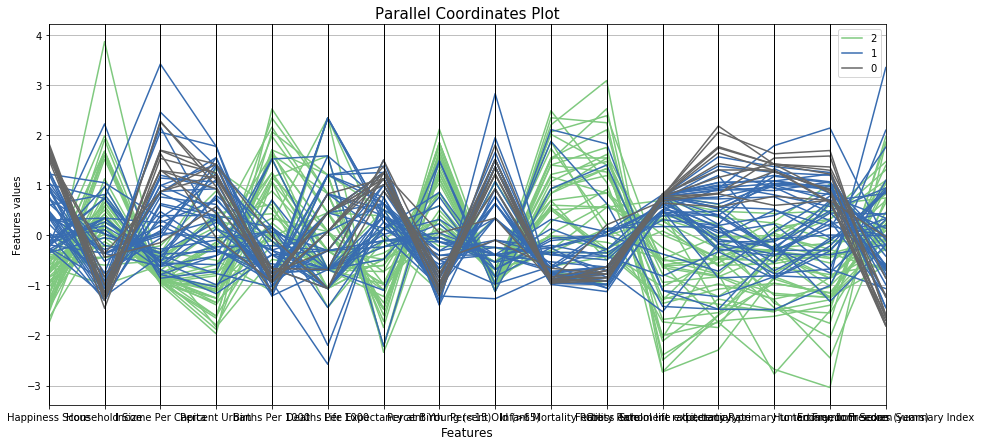

In [51]:
#Parallel Coordinates plot are plotted using training dataset

plt.figure(figsize=(15,7))
parallel_coordinates(df, "Target Class",colormap = 'Accent')
plt.title('Parallel Coordinates Plot', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features values', fontsize=10)
plt.show()

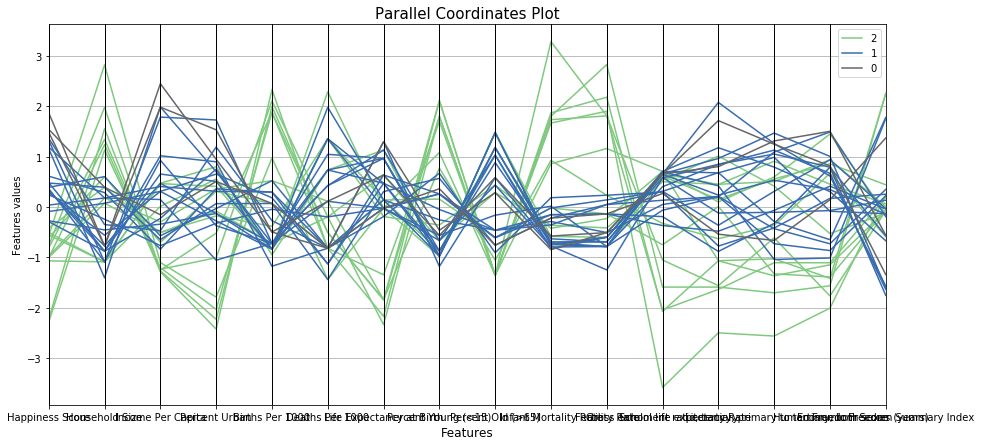

In [52]:
#Parallel Coordinates plot are plotted using test dataset

plt.figure(figsize=(15,7))
parallel_coordinates(df2, "Target Class",colormap = 'Accent')
plt.title('Parallel Coordinates Plot', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features values', fontsize=10)
plt.show()

### Pairplots

<Figure size 432x288 with 0 Axes>

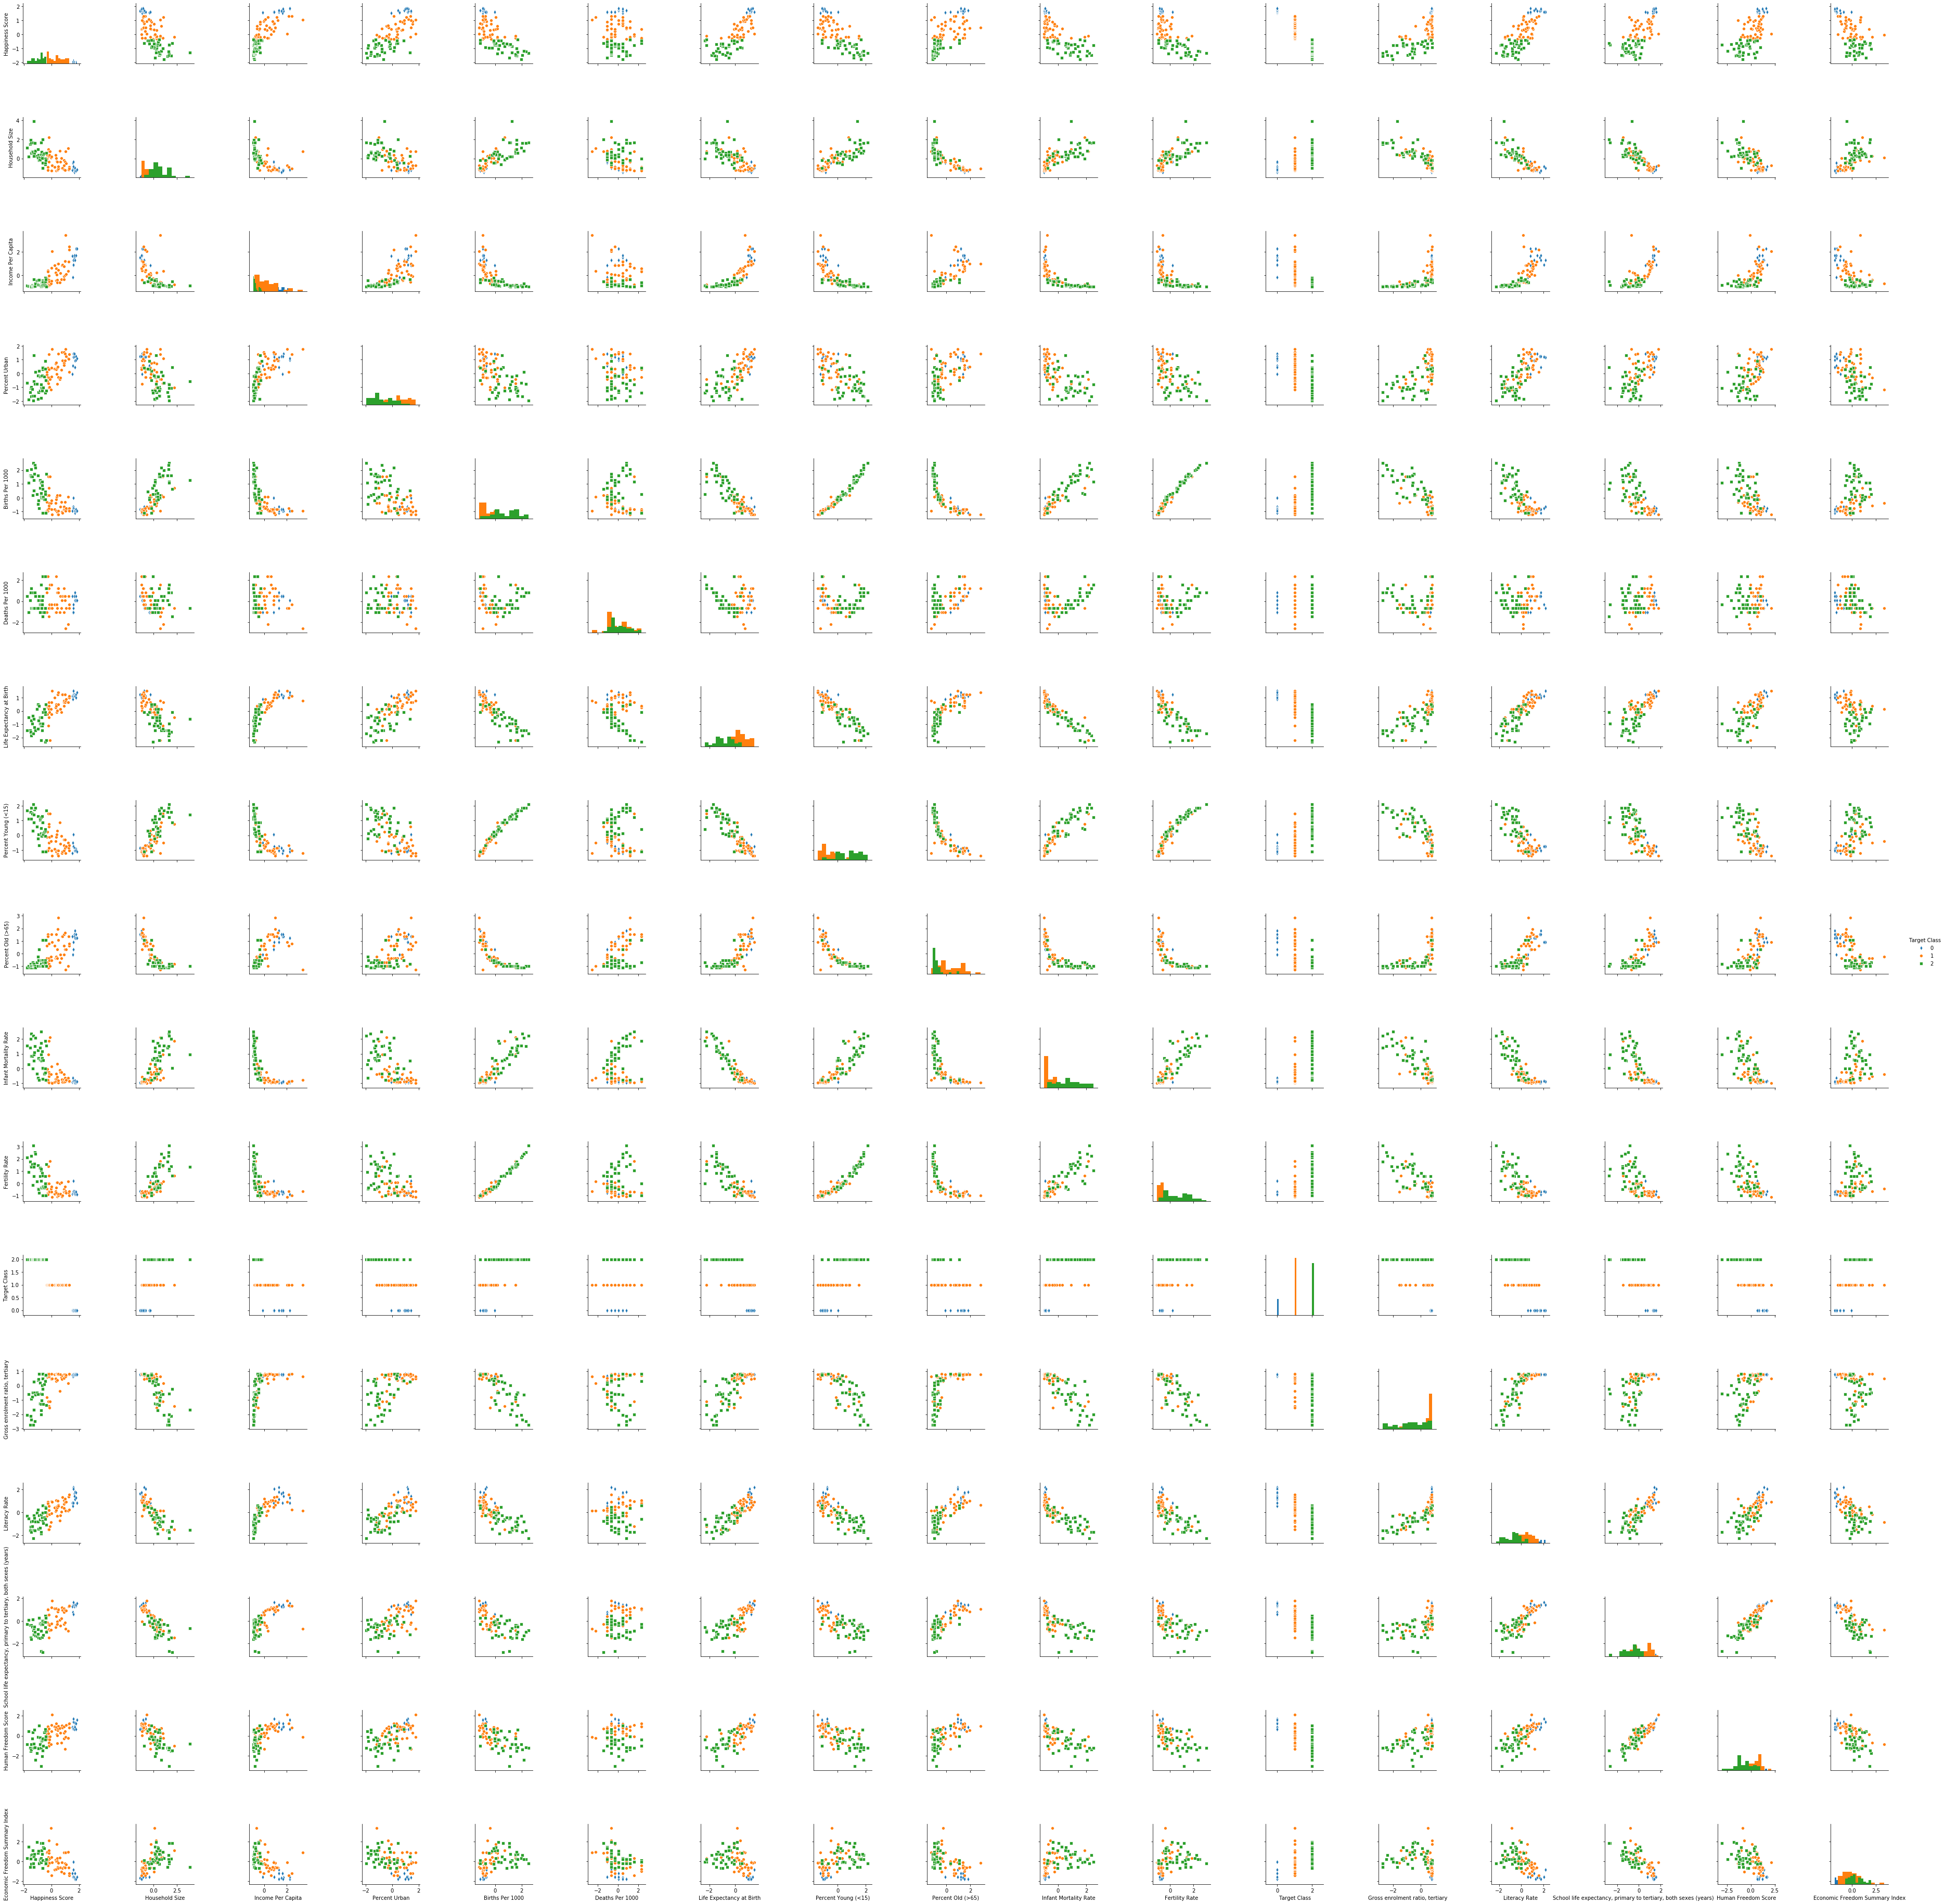

In [53]:
#pairpolts are plotted (train set)

plt.figure()
sns.pairplot(df, hue = "Target Class", markers=["d", "o", "s"], height = 3, diag_kind = 'hist')
plt.show()

#this code takes a while to run

<Figure size 432x288 with 0 Axes>

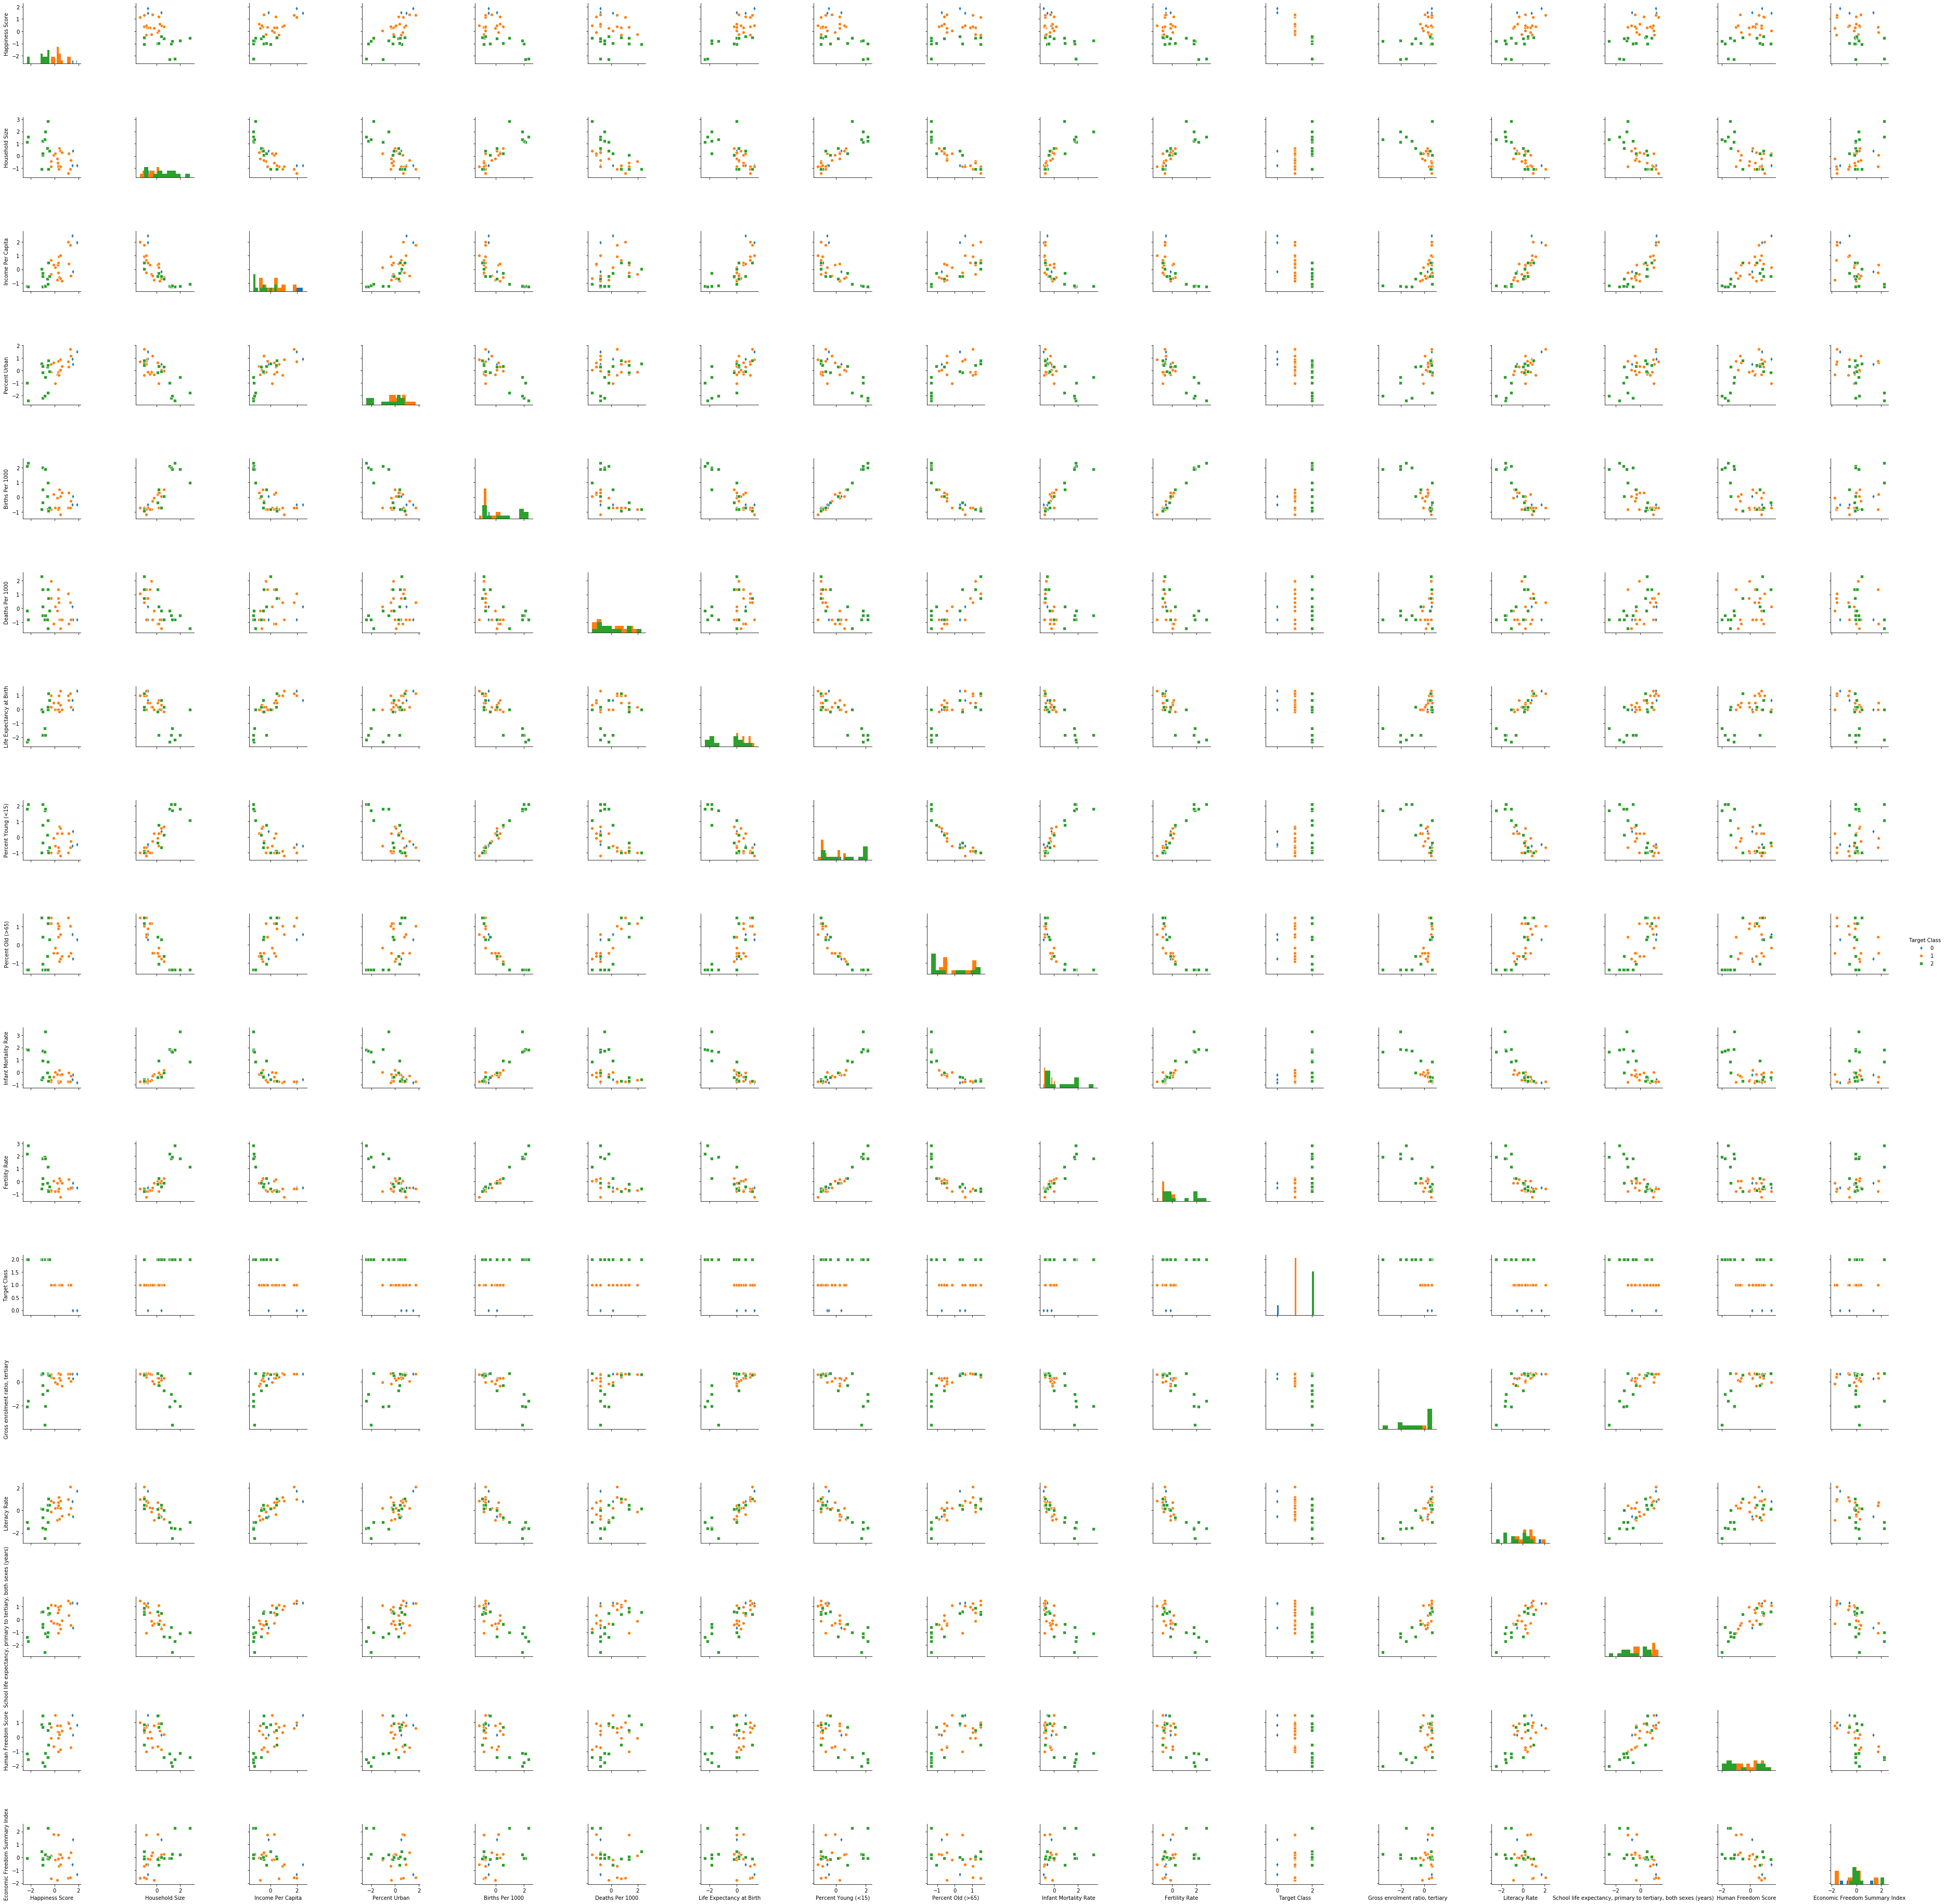

In [54]:
#pairplots (test set)

plt.figure()
sns.pairplot(df2, hue = "Target Class", height=3, markers=["d", "o", "s"],diag_kind = 'hist')
plt.show()

#this code takes a while to run

### Decision Boundary

In [55]:
#decision boundary function

def plot_decision_boundaries(X, y, model_class, **model_params):

    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1")
    plt.ylabel("Feature-2")
    plt.xticks()
    plt.yticks()
    return plt

#this function is taken from the github account of Tirthajyoti Sarkar
#https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

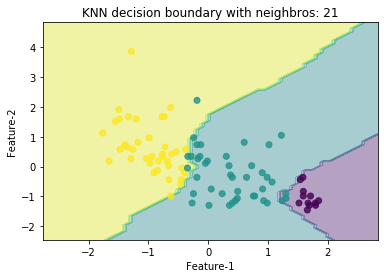

In [56]:
#Decision boundary is plotted using two features

plt.figure()
plt.title("KNN decision boundary with neighbros: 21")
plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=21)
plt.show()

# NeuralNetwork, Thomas Florian

### Import Relevant Libraries

In [57]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.optimizers import Adam
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import innvestigate as inn
from scipy import stats
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [58]:
# Innvestigate library has not been updated for tensorflow 2.0!
# Recommended Python 3.6, Tensorflow 1.12 and Cuda 9.x
print("Running Tensorflow Version", tf.__version__)
assert tf.__version__[0] == "1"

Running Tensorflow Version 1.15.0


### Read and Format data

In [59]:
# Read and Split data
train_data = pd.read_csv("TrainData.csv", index_col=0)
X = train_data.drop(["Happiness Score", "Target Class"], axis=1)
Y = train_data[["Happiness Score"]]
# Standardize data
norm_X = (X-X.mean())/X.std()

In [60]:
# Display Dataframes
display(HTML(norm_X.head().to_html()),HTML(Y.head().to_html()))

,Household Size,Income Per Capita,Percent Urban,Births Per 1000,Deaths Per 1000,Life Expectancy at Birth,Percent Young (<15),Percent Old (>65),Infant Mortality Rate,Fertility Rate,"Gross enrolment ratio, tertiary",Literacy Rate,"School life expectancy, primary to tertiary, both sexes (years)",Human Freedom Score,Economic Freedom Summary Index,Press Freedom Index
Angola,0.811268,-0.698781,0.127181,2.150234,0.449983,-1.460536,1.841213,-1.113601,2.054723,2.376442,-0.982624,-0.643233,-0.820364,-1.284213,-2.433957,0.203097
Argentina,-0.357364,0.031567,1.412480,-0.295362,0.073634,0.633211,-0.308654,0.341673,-0.629413,-0.278733,1.405405,0.720988,1.188372,-0.135582,-1.311504,-0.191336
Armenia,-0.201547,-0.400404,0.171502,-0.748250,0.449983,0.386888,-0.666965,0.341673,-0.760804,-0.767844,0.417472,0.805321,-0.249225,0.272609,1.020585,-0.205149
Australia,-0.980635,1.286983,1.146556,-0.657672,-0.679066,1.495343,-0.756543,0.923782,-0.896888,-0.697971,1.629263,0.775556,2.172729,1.411747,1.358411,-0.848982
Austria,-1.214361,1.625857,-0.050102,-0.929405,0.449983,1.125858,-1.204431,1.360364,-0.915658,-0.837717,1.419041,0.725948,0.838957,1.269355,0.889814,-1.188932


,Happiness Score
Angola,4.033
Argentina,6.574
Armenia,4.350
Australia,7.284
Austria,7.200


### Define Neural Network

In [61]:
# 1D CNN
def build_model(input_shape):
    # Define model
    model = keras.models.Sequential([
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu', input_shape=input_shape),
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=8, kernel_size=1, activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(1)
    ])

    # Compile Model
    model.compile(loss='mse', optimizer=Adam(lr=0.002))
    
    return model

### Leave-one-out cross validation

In [63]:
cv_results = pd.DataFrame(index=["MLR Prediction", "Lasso Prediction", "Ridge Prediction", "CNN Prediction", "Observed"])

fold = norm_X.shape[0]
tik = time.time()

for i in range(fold):
    # Reset keras session to reduce model clutter
    keras.backend.clear_session()
    
    # Select validation sample
    sample = norm_X.iloc[i].name
    
    # Seperate validation sample from train samples
    trainX = norm_X.drop(sample)
    valX = norm_X.iloc[[i]]
    trainY = Y.drop(sample)
    valY = Y.iloc[[i]]
    
    # Train MLR
    regr = linear_model.LinearRegression()
    regr.fit(trainX, trainY)
    
    # Train Lasso
    lasso = linear_model.Lasso(alpha=0.01)
    lasso.fit(trainX, trainY)
    
    # Train Ridge
    ridge = linear_model.Ridge(alpha=10)
    ridge.fit(trainX, trainY)
    
    # Record predictions of linear models
    mlr_pred = regr.predict(valX)[0][0]
    lasso_pred = lasso.predict(valX)[0]
    ridge_pred = ridge.predict(valX)[0][0]
    
    # Reshape data for 1D CNN
    trainX = np.asarray(trainX).reshape((trainX.shape[0],trainX.shape[1],1))
    valX = np.asarray(valX).reshape((valX.shape[0],valX.shape[1],1))
    trainY = np.asarray(trainY)
    valY = np.asarray(valY)
    
    # Reset CNN
    model = build_model((trainX.shape[1],1))

    # Train the CNN
    model.fit(trainX, trainY, batch_size=32, epochs=200, verbose=0)

    # Record CNN predictions
    cnn_pred = model.predict(valX)[0][0]
    
    # Record observed values
    observed = valY[0][0]
    
    # Display training information
    print("\n==========[ ", i+1, "/", fold," ]==========", sep="")
    print("Sample:", sample, "\nMLR Predicition:", mlr_pred, "\nLasso Predicition:", ridge_pred, "\nRidge Predicition:", lasso_pred, "\nCNN Predicition:", cnn_pred, "\nObserved:", observed)
    
    # Cache training information
    cv_results[sample] = (mlr_pred, lasso_pred, ridge_pred, cnn_pred, observed)

cv_results = cv_results.T

# Display elapsed time
tok = time.time()
print("\nTotal elapsed time:", tok-tik, "seconds\n")


==========[ 1/92 ]==========
Sample: Angola 
MLR Predicition: 4.832591647323494 
Lasso Predicition: 4.608273121049066 
Ridge Predicition: 4.670561647754831 
CNN Predicition: 3.85641 
Observed: 4.033

==========[ 2/92 ]==========
Sample: Argentina 
MLR Predicition: 6.018366843849851 
Lasso Predicition: 6.091713118343579 
Ridge Predicition: 6.0668389731681875 
CNN Predicition: 5.589036 
Observed: 6.574

==========[ 3/92 ]==========
Sample: Armenia 
MLR Predicition: 5.5263336253077044 
Lasso Predicition: 5.5622946586538085 
Ridge Predicition: 5.554208153965543 
CNN Predicition: 5.34927 
Observed: 4.35

==========[ 4/92 ]==========
Sample: Australia 
MLR Predicition: 7.118704578911962 
Lasso Predicition: 7.008676347605795 
Ridge Predicition: 7.027812015377437 
CNN Predicition: 6.5252852 
Observed: 7.284

==========[ 5/92 ]==========
Sample: Austria 
MLR Predicition: 6.723241984745604 
Lasso Predicition: 6.6293842207116676 
Ridge Predicition: 6.716283052142982 
CNN Predicition: 6.181796 
O

In [64]:
cv_results.T

,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Benin,Bhutan,Bolivia,...,Switzerland,Tanzania,Trinidad and Tobago,Uganda,Ukraine,United Kingdom,Uruguay,Vietnam,Zambia,Zimbabwe
MLR Prediction,4.832592,6.018367,5.526334,7.118705,6.723242,4.864577,4.684383,4.167648,4.357020,5.578119,...,7.013250,4.239698,5.213160,4.373112,5.525050,6.437893,6.038874,3.976390,4.012163,4.411521
Lasso Prediction,4.670562,6.066839,5.554208,7.027812,6.716283,4.919807,4.603796,4.286850,4.545421,5.416958,...,7.046168,4.298435,5.299144,4.296810,5.559152,6.419855,6.093353,4.141199,4.183309,4.343202
Ridge Prediction,4.608273,6.091713,5.562295,7.008676,6.629384,4.984555,4.644442,4.292097,4.793117,5.449759,...,7.005359,4.298243,5.397879,4.303911,5.573754,6.480655,6.166964,4.228222,4.220400,4.379705
CNN Prediction,3.856410,5.589036,5.349270,6.525285,6.181796,5.287155,4.648474,4.061352,4.298013,4.754071,...,6.923682,3.765052,5.294663,4.303666,5.436603,5.919309,5.800137,4.810359,3.920089,3.980724
Observed,4.033000,6.574000,4.350000,7.284000,7.200000,5.212000,4.694000,3.340000,5.253000,5.890000,...,7.587000,3.781000,6.168000,3.931000,4.681000,6.867000,6.485000,5.360000,5.129000,4.610000


In [65]:
# Calculate and display R2 score and Mean Squared Error
observations = np.array(cv_results["Observed"])
# Record Predictions
mlr_pred = np.array(cv_results["MLR Prediction"])
cnn_pred = np.array(cv_results["CNN Prediction"])
lasso_pred = np.array(cv_results["Lasso Prediction"])
ridge_pred = np.array(cv_results["Ridge Prediction"])
# Calculate MSE
mlr_mse = np.square(observations - mlr_pred).mean()
cnn_mse = np.square(observations - cnn_pred).mean()
lasso_mse = np.square(observations - lasso_pred).mean()
ridge_mse = np.square(observations - ridge_pred).mean()
# Calculate R2
mlr_r2 = r2_score(observations, mlr_pred)
cnn_r2 = r2_score(observations, cnn_pred)
lasso_r2 = r2_score(observations, lasso_pred)
ridge_r2 = r2_score(observations, ridge_pred)
# Print!
print("MLR R2:", mlr_r2)
# print("MLR MSE:", mlr_mse)
print("Lasso R2:", lasso_r2)
# print("Lasso MSE:", lasso_mse)
print("Ridge R2:", ridge_r2)
# print("Ridge MSE:", ridge_mse)
print("CNN R2:", cnn_r2)
# print("CNN MSE:", cnn_mse)

MLR R2: 0.6262090660104458
Lasso R2: 0.6766941996864133
Ridge R2: 0.6957466142644797
CNN R2: 0.6645456862267954


### Evaluate on test set

In [83]:
# Train the model on entire training set
trainX = np.asarray(norm_X).reshape((norm_X.shape[0],norm_X.shape[1],1))
model = build_model((trainX.shape[1],1))
model.fit(trainX, Y, batch_size=32, epochs=200, verbose=0)
# Load test data
test_data = pd.read_csv("TestData.csv", index_col=0)
testXDF = test_data.drop(["Happiness Score", "Target Class"], axis=1)
testY = test_data[["Happiness Score"]]
# Standardize data
testXDF = (testXDF-X.mean())/X.std()
# Reshape for 1D CNN
testX = np.asarray(testXDF).reshape((testXDF.shape[0],testXDF.shape[1],1))
# Make predictions
Y_pred = model.predict(testX)
# Score Predictions
r2 = r2_score(testY, Y_pred)
print("R2 Score:",r2)

R2 Score: 0.5113122382672517


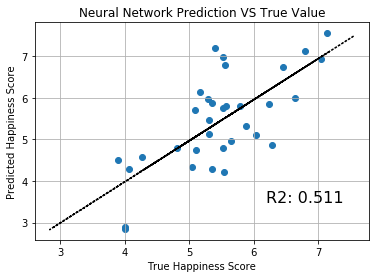

In [84]:
# Visualize Results
plt.scatter(Y_pred, testY);
m, b, r_value, p_value, std_err = stats.linregress(Y_pred.flatten(), testY.values.flatten())
plt.plot(testY, np.multiply(testY, m)+b,"k:")
plt.xlabel("True Happiness Score");
plt.ylabel("Predicted Happiness Score");
plt.title("Neural Network Prediction VS True Value");
plt.text(6.2,3.5,"R2: {:.3f}".format(r2),fontsize=16)
plt.grid();

### Identify Important Features

In [93]:
# Use LRP to rank features from neural network
entire_dataset_XDF = pd.concat([norm_X,testXDF])
entire_dataset_YDF = pd.concat([Y,testY])
entire_dataset_X = np.asarray(entire_dataset_XDF).reshape((entire_dataset_XDF.shape[0],entire_dataset_XDF.shape[1],1))
model = build_model((entire_dataset_X.shape[1],1))
# Training for LRP
model.fit(entire_dataset_X, entire_dataset_Y, batch_size=32, epochs=200, verbose=0)
# Sort features by LRP Relevance Score
analyzer = inn.create_analyzer("lrp.z", model)
lrp = analyzer.analyze(entire_dataset_X).reshape((entire_dataset_X.shape[0],entire_dataset_X.shape[1]))
lrpDF = pd.DataFrame(lrp.mean(axis=0), index=entire_dataset_XDF.columns, columns=["NN LRP Relevance Score"])
lrpDF["Abs(Relevance)"] = np.abs(lrpDF["NN LRP Relevance Score"])
lrpDF.sort_values("Abs(Relevance)",ascending=False, inplace=True)
lrpDF.drop("Abs(Relevance)", axis=1, inplace=True)
# Use p-values to rank features from linear regression
ols = OLS(entire_dataset_Y, entire_dataset_XDF.assign(Intercept=1)).fit()
pvalDF = pd.DataFrame(ols.pvalues, columns=["Linear Regression P-Value"]).sort_values("Linear Regression P-Value").drop("Intercept")
# Display Dataframes
display(HTML(lrpDF.to_html()),HTML(pvalDF.to_html()))

,NN LRP Relevance Score
Life Expectancy at Birth,0.148568
Income Per Capita,0.112832
Literacy Rate,0.109983
Percent Urban,0.085142
"School life expectancy, primary to tertiary, both sexes (years)",0.083921
Deaths Per 1000,-0.066391
Percent Old (>65),-0.047102
Births Per 1000,-0.028149
"Gross enrolment ratio, tertiary",0.022539
Fertility Rate,-0.020714


,Linear Regression P-Value
Income Per Capita,0.000505
Press Freedom Index,0.039886
Life Expectancy at Birth,0.039950
Infant Mortality Rate,0.047477
Percent Urban,0.087246
"Gross enrolment ratio, tertiary",0.180300
Percent Young (<15),0.189741
Percent Old (>65),0.196469
Literacy Rate,0.200308
Household Size,0.235477
